# Machine Learning Exercise 1 - Congressional Voting Records Dataset

### v2.0

In [114]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Seaborn version:", sns.__version__)

NumPy version: 1.24.3
Pandas version: 2.0.3
Scikit-learn version: 1.3.2
Seaborn version: 0.12.2


In [115]:
### Models
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Parameter tuning / Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

### Model evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

### Load train dataset

In [116]:
train = pd.read_csv(
    "CongressionalVotingID.shuf.lrn.csv"
)
train

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,249,republican,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,140,democrat,y,n,y,n,n,y,y,y,y,n,n,n,n,n,y,y
2,383,democrat,y,y,n,y,y,y,n,n,n,n,y,n,y,y,n,unknown
3,201,democrat,n,n,y,n,n,n,y,y,y,n,n,n,n,y,y,y
4,297,republican,n,n,y,y,y,y,n,n,n,y,n,y,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,106,democrat,y,y,y,n,n,n,n,y,y,n,y,n,n,n,y,y
214,271,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
215,275,republican,y,n,n,y,y,n,y,n,n,y,n,n,n,y,y,y
216,354,republican,n,n,y,y,y,y,y,n,n,y,y,y,y,y,n,y


In [117]:
for column in train.columns:
    unique_values = train[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")

Column: ID, Unique Values: [249 140 383 201 297 309 308 420 263 181 390 318 407 394 374 168 265  41
 183   5 165   2 422  70  91 323 398 391 355 142 199  66  23 219 116 372
 370 146 334  33 349 143 403 241 424 205 361 243 163 427 360 157 135 301
  10 373 208 429 401 180 176 202 369 400 392 325 304 338 435 200 333 123
  15  47 315  40 268 426 272  64  58 149  17 255 117  11 267 137 173 293
 299 225  88  71 214  45   7 235 414 164 233 260 218 303 428 276 321 412
 364  21 107 227 288 138 109 169 382 285 379 139 240 193 257 395 332  24
 104 279 313 222 236 359 131  86 192 239 367 115 141 207 280 244 270  99
 296 188  56 171  52  68 328 289  16 213 386 129 186 405  87 339  12  54
 177 150 246  60 210 100   9 238 156 103 112 266 282 113 397  57 335 290
 223 353 120 410  28 190 358 347  96 306 110 119  14 228 194   3  51 151
 316 127 320 314 326 158 170   6 345 269 261  18 291  90 178 106 271 275
 354 324]
Column: class, Unique Values: ['republican' 'democrat']
Column: handicapped-infants, Un

### Load test dataset

In [118]:
test = pd.read_csv(
    "CongressionalVotingID.shuf.tes.csv"
)
test

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,102,y,n,y,n,y,y,y,n,n,n,y,n,n,y,n,y
1,413,n,n,n,y,y,y,n,n,n,y,n,y,y,y,n,y
2,30,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
3,298,y,y,y,n,n,y,y,y,y,y,n,n,unknown,n,y,unknown
4,95,y,n,y,n,y,y,n,n,n,n,n,n,n,n,n,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,179,unknown,n,y,n,n,n,y,y,y,y,y,unknown,n,n,y,unknown
213,256,y,n,y,n,n,n,y,y,y,y,n,n,n,y,y,y
214,278,n,n,y,y,y,y,y,y,n,y,n,n,n,y,n,y
215,264,y,n,y,n,n,n,y,y,y,n,n,n,n,n,y,unknown


### Exploring the data

### Converting values to numeric
#### Train set

<Axes: xlabel='class'>

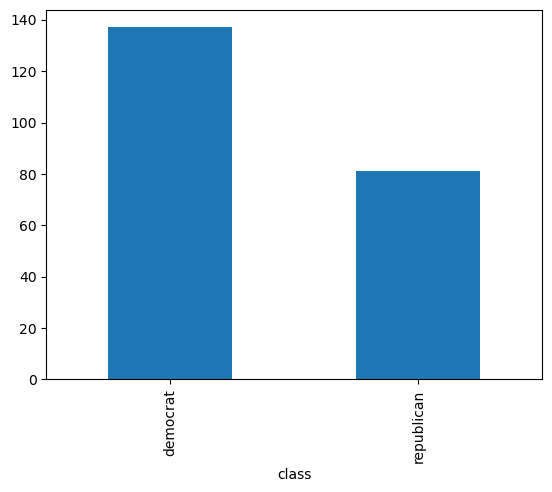

In [119]:
train['class'].value_counts().plot(kind='bar')

In [120]:
train.columns

Index(['ID', 'class', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-crporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')

In [121]:
ynmap = {'y': 1, 'n': 0, '?': np.nan}
classmap = {'republican': 1, 'democrat': 0}

train['Class'] = train['class'].map(classmap)
train.drop('class', axis=1, inplace=True)

columns_to_map = [
    'handicapped-infants',
    'water-project-cost-sharing',
    'adoption-of-the-budget-resolution',
    'physician-fee-freeze',
    'el-salvador-aid', 
    'religious-groups-in-schools',
    'anti-satellite-test-ban', 
    'aid-to-nicaraguan-contras',
    'mx-missile',
    'immigration',
    'synfuels-crporation-cutback',
    'education-spending',
    'superfund-right-to-sue',
    'crime',
    'duty-free-exports',
    'export-administration-act-south-africa'
]

for column in columns_to_map:
    train[column] = train[column].map(ynmap)
    train.rename(columns={column: column.replace('-', ' ').title()}, inplace=True)
    
for column in columns_to_map:
    test[column] = test[column].map(ynmap)
    test.rename(columns={column: column.replace('-', ' ').title()}, inplace=True)

In [122]:
train

,ID,Handicapped Infants,Water Project Cost Sharing,Adoption Of The Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups In Schools,Anti Satellite Test Ban,Aid To Nicaraguan Contras,Mx Missile,Immigration,Synfuels Crporation Cutback,Education Spending,Superfund Right To Sue,Crime,Duty Free Exports,Export Administration Act South Africa,Class
0,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,140,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
2,383,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,0
3,201,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0
4,297,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,106,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0
214,271,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
215,275,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1
216,354,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1


In [123]:
train.isna().sum()

ID                                         0
Handicapped Infants                        7
Water Project Cost Sharing                21
Adoption Of The Budget Resolution          4
Physician Fee Freeze                       6
El Salvador Aid                            9
Religious Groups In Schools                5
Anti Satellite Test Ban                    6
Aid To Nicaraguan Contras                 10
Mx Missile                                12
Immigration                                4
Synfuels Crporation Cutback               13
Education Spending                        16
Superfund Right To Sue                    14
Crime                                      7
Duty Free Exports                         14
Export Administration Act South Africa    58
Class                                      0
dtype: int64

In [124]:
test.isna().sum()

ID                                         0
Handicapped Infants                        5
Water Project Cost Sharing                27
Adoption Of The Budget Resolution          7
Physician Fee Freeze                       5
El Salvador Aid                            6
Religious Groups In Schools                6
Anti Satellite Test Ban                    8
Aid To Nicaraguan Contras                  5
Mx Missile                                10
Immigration                                3
Synfuels Crporation Cutback                8
Education Spending                        15
Superfund Right To Sue                    11
Crime                                     10
Duty Free Exports                         14
Export Administration Act South Africa    46
dtype: int64

In [125]:
train.columns

Index(['ID', 'Handicapped Infants', 'Water Project Cost Sharing',
       'Adoption Of The Budget Resolution', 'Physician Fee Freeze',
       'El Salvador Aid', 'Religious Groups In Schools',
       'Anti Satellite Test Ban', 'Aid To Nicaraguan Contras', 'Mx Missile',
       'Immigration', 'Synfuels Crporation Cutback', 'Education Spending',
       'Superfund Right To Sue', 'Crime', 'Duty Free Exports',
       'Export Administration Act South Africa', 'Class'],
      dtype='object')

In [126]:
from sklearn.impute import KNNImputer
import pandas as pd

#id_column = train['ID']  # Store the ID column
#train = train.drop('ID', axis=1)  # Drop the ID column for imputation

imputer = KNNImputer(n_neighbors=5)
train_imputed = train.copy()
train_imputed = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)

#Add the ID column back to the imputed DataFrame

#id_column = test['ID']  # Store the ID column
#test = test.drop('ID', axis=1)  # Drop the ID column for imputation
test_imputed = test.copy()
test_imputed = pd.DataFrame(imputer.fit_transform(test), columns=test.columns)

# Now, train_imputed contains the imputed values with the original ID column


In [127]:
class_column = train_imputed.pop('Class')  # Remove 'Class' column and store it
train_imputed.insert(1, 'Class', class_column) # Insert the 'Class' column at the second position

In [128]:
train_imputed['ID'] = train_imputed['ID'].astype(int)
train_imputed['Class'] = train_imputed['Class'].astype(int)
test_imputed['ID'] = test_imputed['ID'].astype(int)

In [129]:
train_imputed

,ID,Class,Handicapped Infants,Water Project Cost Sharing,Adoption Of The Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups In Schools,Anti Satellite Test Ban,Aid To Nicaraguan Contras,Mx Missile,Immigration,Synfuels Crporation Cutback,Education Spending,Superfund Right To Sue,Crime,Duty Free Exports,Export Administration Act South Africa
0,249,1,0.4,0.2,0.6,0.2,0.4,0.4,0.8,0.6,0.6,0.6,0.2,0.4,0.4,0.4,0.6,1.0
1,140,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,383,0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.4
3,201,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,297,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,106,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
214,271,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
215,275,1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
216,354,1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


### Transforming categorical values into numerical
#### Test set

In [130]:
#Setting the ID column as index
train_imputed.set_index('ID', inplace=True)
test_imputed.set_index('ID', inplace=True)

In [131]:
test_imputed

,Handicapped Infants,Water Project Cost Sharing,Adoption Of The Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups In Schools,Anti Satellite Test Ban,Aid To Nicaraguan Contras,Mx Missile,Immigration,Synfuels Crporation Cutback,Education Spending,Superfund Right To Sue,Crime,Duty Free Exports,Export Administration Act South Africa
ID,,,,,,,,,,,,,,,,
102,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
413,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
30,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
298,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.6,0.0,1.0,0.8
95,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.4,0.0,0.0,1.0,1.0
256,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
278,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


### Splitting the train dataset into train and validation

#### Defining X and y

In [132]:
X = train_imputed.drop(columns=["Class"])
y = train_imputed["Class"]

In [137]:
from sklearn.model_selection import KFold
import numpy as np

# Assume you have your features X and labels y

# Outer cross-validation for model evaluation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust the number of folds as needed

all_train_indices = []
all_valid_indices = []

for train_idx, valid_idx in outer_cv.split(X, y):
    all_train_indices.extend(train_idx)
    all_valid_indices.extend(valid_idx)

# Combine training and validation sets
X_train_and_valid = X.iloc[all_train_indices]
y_train_and_valid = y.iloc[all_train_indices]

# Inner cross-validation for hyperparameter tuning
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust the number of folds as needed

### Random Forest

In [138]:
# Replace RandomForestClassifier with your chosen model
model = RandomForestClassifier()
num_cols = len(X.columns)
n_est_space=np.array([round(x) for x in np.logspace(1, 1.5, num = 20)])
max_feat_space=np.arange(round(np.sqrt(num_cols) / 2), round(np.sqrt(num_cols) * 2) + 1)

param_grid_rf = {'n_estimators': n_est_space, 'max_features': max_feat_space}

# Define the hyperparameters you want to tune and their possible values
#param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

# GridSearchCV performs the inner loop of cross-validation and hyperparameter tuning
grid_search = GridSearchCV(model, param_grid_rf, cv=inner_cv)
grid_search.fit(X_train_and_valid, y_train_and_valid)

# Now, you can train the final model on the entire training dataset
final_rf_model = RandomForestClassifier(**grid_search.best_params_)
final_rf_model.fit(X_train_and_valid, y_train_and_valid)

# For evaluating on the test set, if it's not labeled, you need to obtain predictions
# Replace X_test_unlabeled with your actual unlabeled test set
#X_test_unlabeled = test_imputed

# Get predictions from the final model
predictions_rf = final_rf_model.predict(test_imputed)

# Now, 'predictions' contains the predicted labels for your unlabeled test set
# You may want to further analyze or use these predictions based on your specific use case

In [139]:
hyperparameters_rf = final_rf_model.get_params()

# Print the hyperparameters
print("Random Forest Model Hyperparameters:")
for param, value in hyperparameters_rf.items():
    print(f"{param}: {value}")

Random Forest Model Hyperparameters:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: 2
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 10
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [140]:
print("Tuned Random Forest Parameters: {}".format(grid_search.best_params_))
print("Tuned Random Forest Accuracy: {}".format(grid_search.best_score_))

Tuned Random Forest Parameters: {'max_features': 2, 'n_estimators': 10}
Tuned Random Forest Accuracy: 1.0


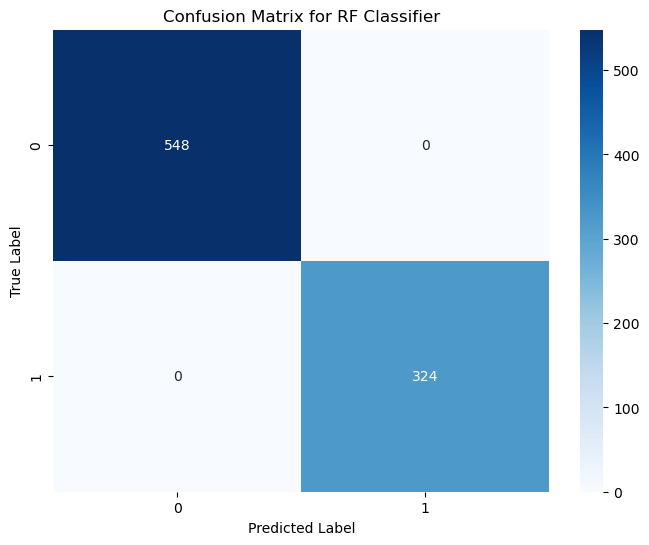

In [141]:
# Creating the confusion matrix
cm_rf = confusion_matrix(y_train_and_valid, final_rf_model.predict(X_train_and_valid))

# Displaying the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=final_rf_model.classes_, yticklabels=final_rf_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for RF Classifier")
plt.show()

In [145]:
result_rf = pd.DataFrame({'ID': test_imputed.index, 'Class': predictions_rf})

classmap = {1: 'republican', 0: 'democrat'}

result_rf['class'] = result_rf['Class'].map(classmap)
result_rf.drop('Class', axis=1, inplace=True)

In [146]:
result_rf

,ID,class
0,102,democrat
1,413,republican
2,30,democrat
3,298,democrat
4,95,democrat
...,...,...
212,179,democrat
213,256,democrat
214,278,republican
215,264,democrat


In [147]:
# Save the DataFrame to a CSV file
result_rf.to_csv('predictions_rf_n11.csv', index=False)

# Print the first few rows of the DataFrame
print(result_rf)

      ID       class
0    102    democrat
1    413  republican
2     30    democrat
3    298    democrat
4     95    democrat
..   ...         ...
212  179    democrat
213  256    democrat
214  278  republican
215  264    democrat
216  226  republican

[217 rows x 2 columns]


### Naive Bayes 



In [148]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import numpy as np


model = MultinomialNB()

param_grid = {'alpha': [0.1, 0.5, 1.0]}  # Adjust the values as needed

# GridSearchCV performs the inner loop of cross-validation and hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=inner_cv)
grid_search.fit(X_train_and_valid, y_train_and_valid)

# Now, you can train the final model on the entire training dataset
final_nb_model = MultinomialNB(alpha=grid_search.best_params_['alpha'])
final_nb_model.fit(X_train_and_valid, y_train_and_valid)

predictions_nb = final_nb_model.predict(test_imputed)

In [149]:
print("Naive Bayes Parameters: {}".format(grid_search.best_params_))
print("Naive Bayes Accuracy: {}".format(grid_search.best_score_))

Naive Bayes Parameters: {'alpha': 0.1}
Naive Bayes Accuracy: 0.9025418719211824


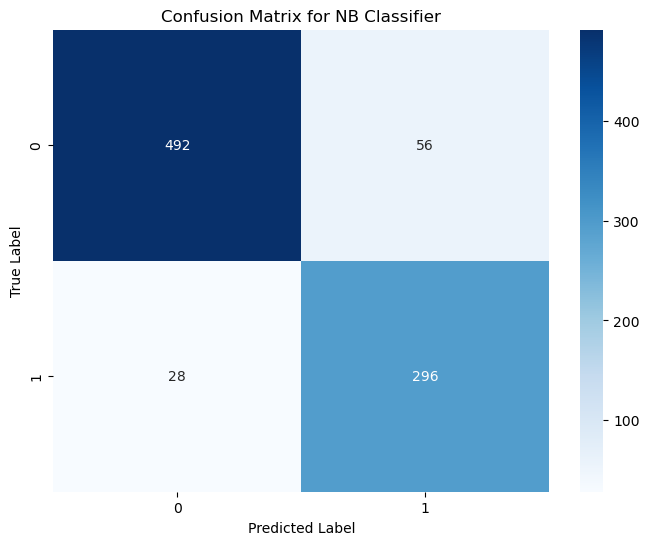

In [150]:
# Creating the confusion matrix
cm_nb = confusion_matrix(y_train_and_valid, final_nb_model.predict(X_train_and_valid))

# Displaying the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=final_nb_model.classes_, yticklabels=final_nb_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for NB Classifier")
plt.show()

In [151]:
hyperparameters_nb = final_nb_model.get_params()

print("Naive Bayes Model Hyperparameters:")
for param, value in hyperparameters_nb.items():
    print(f"{param}: {value}")

Naive Bayes Model Hyperparameters:
alpha: 0.1
class_prior: None
fit_prior: True
force_alpha: warn


In [152]:
result_nb = pd.DataFrame({'ID': test_imputed.index, 'Class': predictions_nb})

classmap = {1: 'republican', 0: 'democrat'}

result_nb['class'] = result_nb['Class'].map(classmap)
result_nb.drop('Class', axis=1, inplace=True)

In [153]:
result_nb

,ID,class
0,102,democrat
1,413,republican
2,30,democrat
3,298,democrat
4,95,democrat
...,...,...
212,179,democrat
213,256,democrat
214,278,republican
215,264,democrat


### XG Boost

In [159]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import numpy as np

model = XGBClassifier()

# Define the hyperparameters you want to tune and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(model, param_grid, cv=inner_cv)
grid_search.fit(X_train_and_valid, y_train_and_valid)

# Now, you can train the final model on the entire training dataset
final_xgb_model = XGBClassifier(**grid_search.best_params_)
final_xgb_model.fit(X_train_and_valid, y_train_and_valid)

predictions_xgb = final_xgb_model.predict(test_imputed)

In [160]:
print("XG Boost Parameters: {}".format(grid_search.best_params_))
print("XG Boost Accuracy: {}".format(grid_search.best_score_))

XG Boost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
XG Boost Accuracy: 1.0


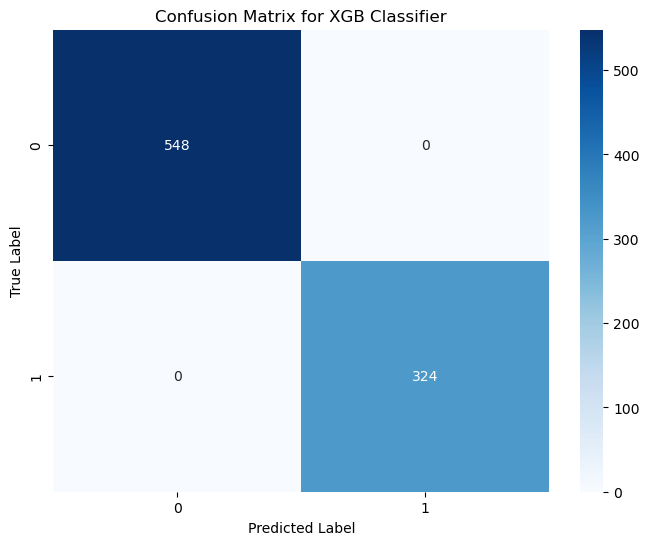

In [161]:
# Creating the confusion matrix
cm_xgb = confusion_matrix(y_train_and_valid, final_xgb_model.predict(X_train_and_valid))

# Displaying the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=final_xgb_model.classes_, yticklabels=final_xgb_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGB Classifier")
plt.show()

In [162]:
hyperparameters_xgb = final_xgb_model.get_params()

print("XGBoost Model Hyperparameters:")
for param, value in hyperparameters_xgb.items():
    print(f"{param}: {value}")

XGBoost Model Hyperparameters:
objective: binary:logistic
base_score: None
booster: None
callbacks: None
colsample_bylevel: None
colsample_bynode: None
colsample_bytree: None
device: None
early_stopping_rounds: None
enable_categorical: False
eval_metric: None
feature_types: None
gamma: None
grow_policy: None
importance_type: None
interaction_constraints: None
learning_rate: 0.1
max_bin: None
max_cat_threshold: None
max_cat_to_onehot: None
max_delta_step: None
max_depth: 3
max_leaves: None
min_child_weight: None
missing: nan
monotone_constraints: None
multi_strategy: None
n_estimators: 200
n_jobs: None
num_parallel_tree: None
random_state: None
reg_alpha: None
reg_lambda: None
sampling_method: None
scale_pos_weight: None
subsample: None
tree_method: None
validate_parameters: None
verbosity: None


In [163]:
result_xgb = pd.DataFrame({'ID': test_imputed.index, 'Class': predictions_xgb})

classmap = {1: 'republican', 0: 'democrat'}

result_xgb['class'] = result_xgb['Class'].map(classmap)
result_xgb.drop('Class', axis=1, inplace=True)

In [164]:
result_xgb

,ID,class
0,102,democrat
1,413,republican
2,30,democrat
3,298,democrat
4,95,democrat
...,...,...
212,179,democrat
213,256,democrat
214,278,republican
215,264,democrat


In [165]:
# Save the DataFrame to a CSV file
result_xgb.to_csv('predictions_xgb.csv', index=False)

### SVM

In [168]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

model = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV performs the inner loop of cross-validation and hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=inner_cv)
grid_search.fit(X_train_and_valid, y_train_and_valid)

# Now, you can train the final model on the entire training dataset
final_svc_model = SVC(**grid_search.best_params_)
final_svc_model.fit(X_train_and_valid, y_train_and_valid)


# Get predictions from the final model
predictions_svc = final_svc_model.predict(test_imputed)

# Now, 'predictions' contains the predicted labels for your unlabeled test set
# You may want to further analyze or use these predictions based on your specific use case


In [169]:
print("SVM Parameters: {}".format(grid_search.best_params_))
print("SVM Accuracy: {}".format(grid_search.best_score_))

SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Accuracy: 1.0


In [170]:
hyperparameters_svc = final_svc_model.get_params()

print("SVC Model Hyperparameters:")
for param, value in hyperparameters_svc.items():
    print(f"{param}: {value}")

SVC Model Hyperparameters:
C: 10
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: scale
kernel: rbf
max_iter: -1
probability: False
random_state: None
shrinking: True
tol: 0.001
verbose: False


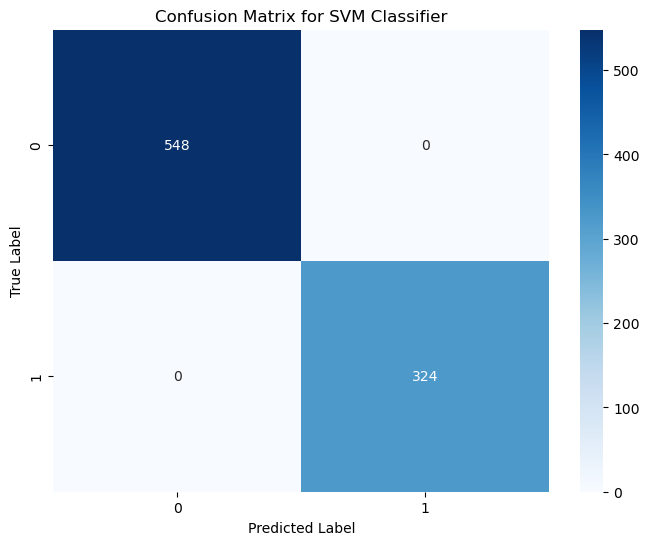

In [171]:
# Creating the confusion matrix
cm_svc = confusion_matrix(y_train_and_valid, final_svc_model.predict(X_train_and_valid))

# Displaying the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", xticklabels=final_svc_model.classes_, yticklabels=final_svc_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM Classifier")
plt.show()

In [172]:
result_svc = pd.DataFrame({'ID': test_imputed.index, 'Class': predictions_svc})

classmap = {1: 'republican', 0: 'democrat'}

result_svc['class'] = result_svc['Class'].map(classmap)
result_svc.drop('Class', axis=1, inplace=True)

In [173]:
result_svc

,ID,class
0,102,democrat
1,413,republican
2,30,democrat
3,298,democrat
4,95,democrat
...,...,...
212,179,democrat
213,256,democrat
214,278,republican
215,264,democrat


In [174]:
# Save the DataFrame to a CSV file
result_svc.to_csv('predictions_svc.csv', index=False)

### Logistic Regression

In [176]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np


model = LogisticRegression()

# Define the hyperparameters you want to tune and their possible values
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# GridSearchCV performs the inner loop of cross-validation and hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=inner_cv)
grid_search.fit(X_train_and_valid, y_train_and_valid)

# Now, you can train the final model on the entire training dataset
final_lr_model = LogisticRegression(**grid_search.best_params_)
final_lr_model.fit(X_train_and_valid, y_train_and_valid)


# Get predictions from the final model
predictions_lr = final_lr_model.predict(test_imputed)

# Now, 'predictions' contains the predicted labels for your unlabeled test set
# You may want to further analyze or use these predictions based on your specific use case


/Users/gretagyori/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gretagyori/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gretagyori/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gretagyori/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gretagyori/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gretagyori/anaconda3/lib/python3.

In [177]:
print("LR Best Parameters: {}".format(grid_search.best_params_))
print("LR Accuracy: {}".format(grid_search.best_score_))

LR Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
LR Accuracy: 0.9782200328407225


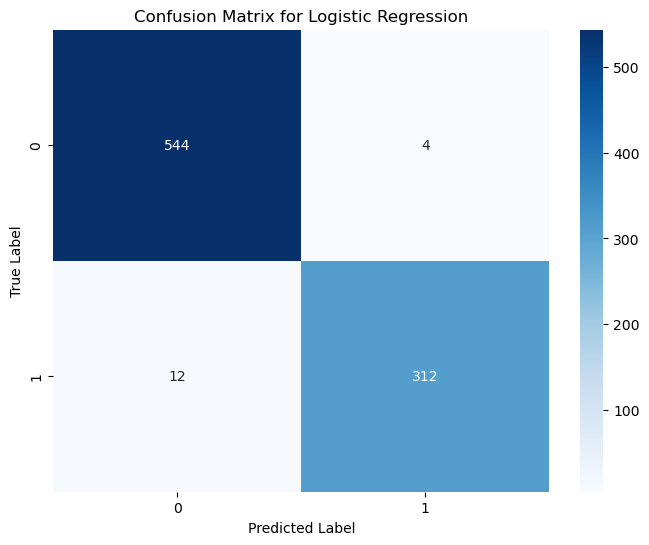

In [879]:
# Creating the confusion matrix
cm_lr = confusion_matrix(y_train_and_valid, final_lr_model.predict(X_train_and_valid))

# Displaying the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=final_lr_model.classes_, yticklabels=final_lr_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [178]:
hyperparameters_lr = final_lr_model.get_params()

print("Logistic Regression Model Hyperparameters:")
for param, value in hyperparameters_lr.items():
    print(f"{param}: {value}")

Logistic Regression Model Hyperparameters:
C: 10
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 100
multi_class: auto
n_jobs: None
penalty: l2
random_state: None
solver: liblinear
tol: 0.0001
verbose: 0
warm_start: False


In [179]:
result_lr = pd.DataFrame({'ID': test_imputed.index, 'Class': predictions_lr})

classmap = {1: 'republican', 0: 'democrat'}

result_lr['class'] = result_lr['Class'].map(classmap)
result_lr.drop('Class', axis=1, inplace=True)

In [180]:
result_lr

,ID,class
0,102,democrat
1,413,republican
2,30,democrat
3,298,democrat
4,95,democrat
...,...,...
212,179,democrat
213,256,democrat
214,278,republican
215,264,democrat


###  5-fold CV

#### Random Forest

In [260]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate


import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn import metrics

# Assuming you have a dataset 'train' with features X_train and labels y_train

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)



# Random Forest
rf = RandomForestClassifier()
rf_accuracy = cross_val_score(rf, X_train, y_train, cv=kf, scoring='accuracy')
rf_precision = cross_val_score(rf, X_train, y_train, cv=kf, scoring='precision')
rf_recall = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
rf_f1 = cross_val_score(rf, X_train, y_train, cv=kf, scoring='f1')

print("Random Forest - Mean Accuracy:", np.mean(rf_accuracy))
print("Random Forest - Mean Precision:", np.mean(rf_precision))
print("Random Forest - Mean Recall:", np.mean(rf_recall))
print("Random Forest - Mean F1 Score:", np.mean(rf_f1))

Random Forest - Mean Accuracy: 0.9484033613445378
Random Forest - Mean Precision: 0.9290346907993967
Random Forest - Mean Recall: 0.9273260073260075
Random Forest - Mean F1 Score: 0.9312820512820513


#### Logistic Regression

In [261]:
# Logistic Regression
lr = LogisticRegression()
lr_accuracy = cross_val_score(lr, X_train, y_train, cv=kf, scoring='accuracy')
lr_precision = cross_val_score(lr, X_train, y_train, cv=kf, scoring='precision')
lr_recall = cross_val_score(lr, X_train, y_train, cv=kf, scoring='recall')
lr_f1 = cross_val_score(lr, X_train, y_train, cv=kf, scoring='f1')

print("Logistic Regression - Mean Accuracy:", np.mean(lr_accuracy))
print("Logistic Regression - Mean Precision:", np.mean(lr_precision))
print("Logistic Regression - Mean Recall:", np.mean(lr_recall))
print("Logistic Regression - Mean F1 Score:", np.mean(lr_f1))

Logistic Regression - Mean Accuracy: 0.9598319327731092
Logistic Regression - Mean Precision: 0.9567307692307694
Logistic Regression - Mean Recall: 0.9406593406593406
Logistic Regression - Mean F1 Score: 0.9467791563275434


#### XGBoost

In [262]:
# XGBoost
xgboost = xgb.XGBClassifier()
xgb_accuracy = cross_val_score(xgboost, X_train, y_train, cv=kf, scoring='accuracy')
xgb_precision = cross_val_score(xgboost, X_train, y_train, cv=kf, scoring='precision')
xgb_recall = cross_val_score(xgboost, X_train, y_train, cv=kf, scoring='recall')
xgb_f1 = cross_val_score(xgboost, X_train, y_train, cv=kf, scoring='f1')

print("XGBoost - Mean Accuracy:", np.mean(xgb_accuracy))
print("XGBoost - Mean Precision:", np.mean(xgb_precision))
print("XGBoost - Mean Recall:", np.mean(xgb_recall))
print("XGBoost - Mean F1 Score:", np.mean(xgb_f1))


XGBoost - Mean Accuracy: 0.9598319327731092
XGBoost - Mean Precision: 0.9567307692307694
XGBoost - Mean Recall: 0.9406593406593406
XGBoost - Mean F1 Score: 0.947326164874552


#### SVC

In [263]:

# Support Vector Classifier (SVC)
svc = SVC()
svc_accuracy = cross_val_score(svc, X_train, y_train, cv=kf, scoring='accuracy')
svc_precision = cross_val_score(svc, X_train, y_train, cv=kf, scoring='precision')
svc_recall = cross_val_score(svc, X_train, y_train, cv=kf, scoring='recall')
svc_f1 = cross_val_score(svc, X_train, y_train, cv=kf, scoring='f1')

print("SVC - Mean Accuracy:", np.mean(svc_accuracy))
print("SVC - Mean Precision:", np.mean(svc_precision))
print("SVC - Mean Recall:", np.mean(svc_recall))
print("SVC - Mean F1 Score:", np.mean(svc_f1))


SVC - Mean Accuracy: 0.9541176470588235
SVC - Mean Precision: 0.956043956043956
SVC - Mean Recall: 0.9273260073260075
SVC - Mean F1 Score: 0.9394966106690245


In [264]:
# Print accuracy for each fold
print("\nAccuracy for each fold:")
print("Logistic Regression:", lr_accuracy)
print("Random Forest:", rf_accuracy)
print("SVC:", svc_accuracy)
print("XGBoost:", xgb_accuracy)


Accuracy for each fold:
Logistic Regression: [0.97142857 0.94285714 0.94285714 0.97142857 0.97058824]
Random Forest: [0.94285714 0.94285714 0.91428571 0.97142857 0.97058824]
SVC: [0.97142857 0.94285714 0.91428571 0.97142857 0.97058824]
XGBoost: [0.97142857 0.91428571 0.97142857 0.97142857 0.97058824]


### Holdout

In [265]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn import metrics

X = train_imputed.drop(columns=["Class"])
y = train_imputed["Class"]

# Perform holdout split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize variables to store metrics
metrics_data = []

In [294]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#### Random Forest

In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as sk_metrics # Random Forest
rf_params_1 = {'n_estimators': 100, 'max_depth': 10, 'random_state': 42}
rf_1 = RandomForestClassifier(**rf_params_1)
rf_1.fit(X_train, y_train)
rf_1_preds = rf_1.predict(X_test)
rf_1_accuracy = sk_metrics.accuracy_score(y_test, rf_1_preds)
rf_1_precision = sk_metrics.precision_score(y_test, rf_1_preds)
rf_1_recall = sk_metrics.recall_score(y_test, rf_1_preds)
rf_1_f1 = sk_metrics.f1_score(y_test, rf_1_preds)

In [310]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Define the new parameters
rf_params_2 = {'n_estimators': 150, 'max_depth': 12, 'random_state': 42}  # Change 'n_estimators' to 150 and 'max_depth' to 12

# Create and fit the second Random Forest model
rf_2 = RandomForestClassifier(**rf_params_2)
rf_2.fit(X_train, y_train)
rf_2_preds = rf_2.predict(X_test)

# Calculate performance metrics for the second model
rf_2_accuracy = metrics.accuracy_score(y_test, rf_2_preds)
rf_2_precision = metrics.precision_score(y_test, rf_2_preds)
rf_2_recall = metrics.recall_score(y_test, rf_2_preds)
rf_2_f1 = metrics.f1_score(y_test, rf_2_preds)

# Print the results for the second Random Forest model
print("Second Random Forest Model Metrics:")
print(f"Accuracy: {rf_2_accuracy:.4f}")
print(f"Precision: {rf_2_precision:.4f}")
print(f"Recall: {rf_2_recall:.4f}")
print(f"F1 Score: {rf_2_f1:.4f}")

Second Random Forest Model Metrics:
Accuracy: 0.9091
Precision: 0.8571
Recall: 0.8571
F1 Score: 0.8571


In [311]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Define the new parameters
rf_params_3 = {'n_estimators': 200, 'max_depth': 15, 'random_state': 42}  # Change 'n_estimators' to 200 and 'max_depth' to 15

# Create and fit the third Random Forest model
rf_3 = RandomForestClassifier(**rf_params_3)
rf_3.fit(X_train, y_train)
rf_3_preds = rf_3.predict(X_test)

# Calculate performance metrics for the third model
rf_3_accuracy = metrics.accuracy_score(y_test, rf_3_preds)
rf_3_precision = metrics.precision_score(y_test, rf_3_preds)
rf_3_recall = metrics.recall_score(y_test, rf_3_preds)
rf_3_f1 = metrics.f1_score(y_test, rf_3_preds)

# Print the results for the third Random Forest model
print("Third Random Forest Model Metrics:")
print(f"Accuracy: {rf_3_accuracy:.4f}")
print(f"Precision: {rf_3_precision:.4f}")
print(f"Recall: {rf_3_recall:.4f}")
print(f"F1 Score: {rf_3_f1:.4f}")


Third Random Forest Model Metrics:
Accuracy: 0.9091
Precision: 0.8571
Recall: 0.8571
F1 Score: 0.8571


#### Logistic Regression

In [299]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as sk_metrics # First Iteration
# Logistic Regression
lr_params_1 = {'C': 1.0, 'penalty': 'l2'}
lr_1 = LogisticRegression(**lr_params_1)
lr_1.fit(X_train, y_train)
lr_1_preds = lr_1.predict(X_test)
lr_1_accuracy = sk_metrics.accuracy_score(y_test, lr_1_preds)
lr_1_precision = sk_metrics.precision_score(y_test, lr_1_preds)
lr_1_recall = sk_metrics.recall_score(y_test, lr_1_preds)
lr_1_f1 = sk_metrics.f1_score(y_test, lr_1_preds)

In [301]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as sk_metrics  # Renamed the module to avoid conflict

# Define the new parameters
lr_params_2 = {'C': 3.0, 'penalty': 'l2'}  # Change 'C' to 2.0

# Create and fit the second logistic regression model
lr_2 = LogisticRegression(**lr_params_2)
lr_2.fit(X_train, y_train)
lr_2_preds = lr_2.predict(X_test)

# Calculate performance metrics for the second model
lr_2_accuracy = sk_metrics.accuracy_score(y_test, lr_2_preds)
lr_2_precision = sk_metrics.precision_score(y_test, lr_2_preds)
lr_2_recall = sk_metrics.recall_score(y_test, lr_2_preds)
lr_2_f1 = sk_metrics.f1_score(y_test, lr_2_preds)

# Print the results for the second model
print("Second Logistic Regression Model Metrics:")
print(f"Accuracy: {lr_2_accuracy:.4f}")
print(f"Precision: {lr_2_precision:.4f}")
print(f"Recall: {lr_2_recall:.4f}")
print(f"F1 Score: {lr_2_f1:.4f}")

Second Logistic Regression Model Metrics:
Accuracy: 0.9318
Precision: 0.8667
Recall: 0.9286
F1 Score: 0.8966


In [313]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as sk_metrics  # Renamed the module to avoid conflict

# Define the new parameters
lr_params_3 = {'C': 5.0, 'penalty': 'l2'}  # Change 'C' to 3.0

# Create and fit the third logistic regression model
lr_3 = LogisticRegression(**lr_params_3)
lr_3.fit(X_train, y_train)
lr_3_preds = lr_3.predict(X_test)

# Calculate performance metrics for the third model
lr_3_accuracy = sk_metrics.accuracy_score(y_test, lr_3_preds)
lr_3_precision = sk_metrics.precision_score(y_test, lr_3_preds)
lr_3_recall = sk_metrics.recall_score(y_test, lr_3_preds)
lr_3_f1 = sk_metrics.f1_score(y_test, lr_3_preds)

# Print the results for the third model
print("Third Logistic Regression Model Metrics:")
print(f"Accuracy: {lr_3_accuracy:.4f}")
print(f"Precision: {lr_3_precision:.4f}")
print(f"Recall: {lr_3_recall:.4f}")
print(f"F1 Score: {lr_3_f1:.4f}")

Third Logistic Regression Model Metrics:
Accuracy: 0.9318
Precision: 0.8667
Recall: 0.9286
F1 Score: 0.8966


#### XGBoost

In [317]:
# XGBoost
xgb_params_1 = {'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 50, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
xgb_1 = xgb.XGBClassifier(**xgb_params_1)
xgb_1.fit(X_train, y_train)
xgb_1_preds = xgb_1.predict(X_test)
xgb_1_accuracy = sk_metrics.accuracy_score(y_test, xgb_1_preds)
xgb_1_precision = sk_metrics.precision_score(y_test, xgb_1_preds)
xgb_1_recall = sk_metrics.recall_score(y_test, xgb_1_preds)
xgb_1_f1 = sk_metrics.f1_score(y_test, xgb_1_preds)

In [304]:
import xgboost as xgb
from sklearn import metrics

# Define the new parameters
xgb_params_2 = {'max_depth': 5, 'learning_rate': 0.05, 'n_estimators': 150, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}  # Change the parameters as needed

# Create and fit the second XGBoost model
xgb_2 = xgb.XGBClassifier(**xgb_params_2)
xgb_2.fit(X_train, y_train)
xgb_2_preds = xgb_2.predict(X_test)

# Calculate performance metrics for the second model
xgb_2_accuracy = metrics.accuracy_score(y_test, xgb_2_preds)
xgb_2_precision = metrics.precision_score(y_test, xgb_2_preds)
xgb_2_recall = metrics.recall_score(y_test, xgb_2_preds)
xgb_2_f1 = metrics.f1_score(y_test, xgb_2_preds)

# Print the results for the second XGBoost model
print("Second XGBoost Model Metrics:")
print(f"Accuracy: {xgb_2_accuracy:.4f}")
print(f"Precision: {xgb_2_precision:.4f}")
print(f"Recall: {xgb_2_recall:.4f}")
print(f"F1 Score: {xgb_2_f1:.4f}")


Second XGBoost Model Metrics:
Accuracy: 0.9091
Precision: 0.8571
Recall: 0.8571
F1 Score: 0.8571


In [305]:
import xgboost as xgb
from sklearn import metrics

# Define the new parameters
xgb_params_3 = {'max_depth': 7, 'learning_rate': 0.01, 'n_estimators': 200, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}  # Change the parameters as needed

# Create and fit the third XGBoost model
xgb_3 = xgb.XGBClassifier(**xgb_params_3)
xgb_3.fit(X_train, y_train)
xgb_3_preds = xgb_3.predict(X_test)

# Calculate performance metrics for the third model
xgb_3_accuracy = metrics.accuracy_score(y_test, xgb_3_preds)
xgb_3_precision = metrics.precision_score(y_test, xgb_3_preds)
xgb_3_recall = metrics.recall_score(y_test, xgb_3_preds)
xgb_3_f1 = metrics.f1_score(y_test, xgb_3_preds)

# Print the results for the third XGBoost model
print("Third XGBoost Model Metrics:")
print(f"Accuracy: {xgb_3_accuracy:.4f}")
print(f"Precision: {xgb_3_precision:.4f}")
print(f"Recall: {xgb_3_recall:.4f}")
print(f"F1 Score: {xgb_3_f1:.4f}")


Third XGBoost Model Metrics:
Accuracy: 0.9318
Precision: 0.8667
Recall: 0.9286
F1 Score: 0.8966


#### SVC

In [270]:
# Support Vector Classifier (SVC)
svc_params_1 = {'C': 1.0, 'kernel': 'rbf'}
svc_1 = SVC(**svc_params_1)
svc_1.fit(X_train, y_train)
svc_1_preds = svc_1.predict(X_test)
svc_1_accuracy = metrics.accuracy_score(y_test, svc_1_preds)
svc_1_precision = metrics.precision_score(y_test, svc_1_preds)
svc_1_recall = metrics.recall_score(y_test, svc_1_preds)
svc_1_f1 = metrics.f1_score(y_test, svc_1_preds)

In [306]:
from sklearn.svm import SVC
from sklearn import metrics

# Define the new parameters
svc_params_2 = {'C': 2.0, 'kernel': 'rbf'}  # Change 'C' to 2.0

# Create and fit the second Support Vector Classifier (SVC) model
svc_2 = SVC(**svc_params_2)
svc_2.fit(X_train, y_train)
svc_2_preds = svc_2.predict(X_test)

# Calculate performance metrics for the second model
svc_2_accuracy = metrics.accuracy_score(y_test, svc_2_preds)
svc_2_precision = metrics.precision_score(y_test, svc_2_preds)
svc_2_recall = metrics.recall_score(y_test, svc_2_preds)
svc_2_f1 = metrics.f1_score(y_test, svc_2_preds)

# Print the results for the second SVC model
print("Second Support Vector Classifier (SVC) Model Metrics:")
print(f"Accuracy: {svc_2_accuracy:.4f}")
print(f"Precision: {svc_2_precision:.4f}")
print(f"Recall: {svc_2_recall:.4f}")
print(f"F1 Score: {svc_2_f1:.4f}")


Second Support Vector Classifier (SVC) Model Metrics:
Accuracy: 0.9091
Precision: 0.8571
Recall: 0.8571
F1 Score: 0.8571


In [307]:
from sklearn.svm import SVC
from sklearn import metrics

# Define the new parameters
svc_params_3 = {'C': 3.0, 'kernel': 'rbf'}  # Change 'C' to 3.0

# Create and fit the third Support Vector Classifier (SVC) model
svc_3 = SVC(**svc_params_3)
svc_3.fit(X_train, y_train)
svc_3_preds = svc_3.predict(X_test)

# Calculate performance metrics for the third model
svc_3_accuracy = metrics.accuracy_score(y_test, svc_3_preds)
svc_3_precision = metrics.precision_score(y_test, svc_3_preds)
svc_3_recall = metrics.recall_score(y_test, svc_3_preds)
svc_3_f1 = metrics.f1_score(y_test, svc_3_preds)

# Print the results for the third SVC model
print("Third Support Vector Classifier (SVC) Model Metrics:")
print(f"Accuracy: {svc_3_accuracy:.4f}")
print(f"Precision: {svc_3_precision:.4f}")
print(f"Recall: {svc_3_recall:.4f}")
print(f"F1 Score: {svc_3_f1:.4f}")


Third Support Vector Classifier (SVC) Model Metrics:
Accuracy: 0.9091
Precision: 0.8571
Recall: 0.8571
F1 Score: 0.8571


### Performance Measure Comparison

<Figure size 1200x800 with 0 Axes>

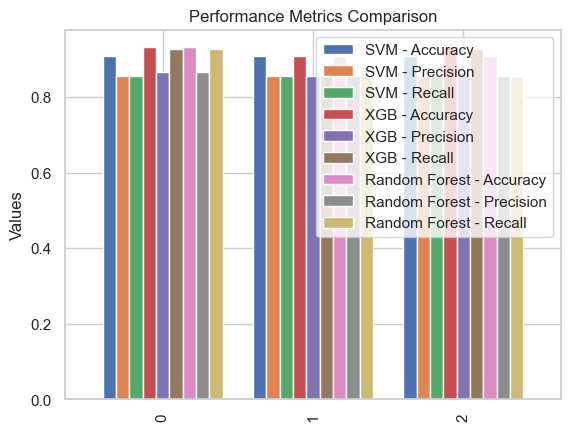

In [320]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'SVM': {
        'Accuracy': [svc_1_accuracy, svc_2_accuracy, svc_3_accuracy],
        'Precision': [svc_1_precision, svc_2_precision, svc_3_precision],
        'Recall': [svc_1_recall, svc_2_recall, svc_3_recall],
    },
    'XGB': {
        'Accuracy': [xgb_1_accuracy, xgb_2_accuracy, xgb_3_accuracy],
        'Precision': [xgb_1_precision, xgb_2_precision, xgb_3_precision],
        'Recall': [xgb_1_recall, xgb_2_recall, xgb_3_recall],
    },
    'Random Forest': {
        'Accuracy': [rf_1_accuracy, rf_2_accuracy, rf_3_accuracy],
        'Precision': [rf_1_precision, rf_2_precision, rf_3_precision],
        'Recall': [rf_1_recall, rf_2_recall, rf_3_recall],
    }
}

# Convert data to DataFrame
df = pd.DataFrame()

for classifier, metrics in data.items():
    for metric, values in metrics.items():
        df[f'{classifier} - {metric}'] = values

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
df.plot(kind='bar', width=0.8)
plt.title('Performance Metrics Comparison')
plt.ylabel('Values')
plt.show()


   SVM - Accuracy  SVM - Precision  SVM - Recall  XGB - Accuracy  \
0        0.909091         0.857143      0.857143        0.931818   
1        0.909091         0.857143      0.857143        0.909091   
2        0.909091         0.857143      0.857143        0.931818   

   XGB - Precision  XGB - Recall  Random Forest - Accuracy  \
0         0.866667      0.928571                  0.931818   
1         0.857143      0.857143                  0.909091   
2         0.866667      0.928571                  0.909091   

   Random Forest - Precision  Random Forest - Recall  
0                   0.866667                0.928571  
1                   0.857143                0.857143  
2                   0.857143                0.857143  


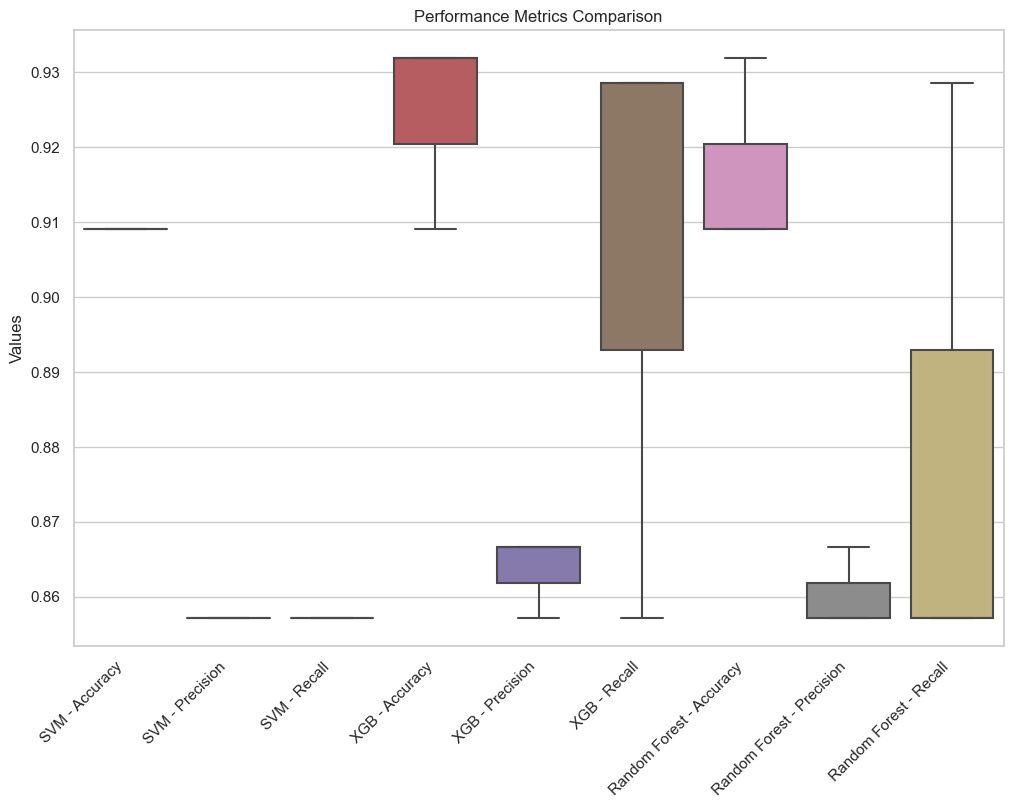

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (replace with your actual data)

data = {
    'SVM': {
        'Accuracy': [svc_1_accuracy, svc_2_accuracy, svc_3_accuracy],
        'Precision': [svc_1_precision, svc_2_precision, svc_3_precision],
        'Recall': [svc_1_recall, svc_2_recall, svc_3_recall],
    },
    'XGB': {
        'Accuracy': [xgb_1_accuracy, xgb_2_accuracy, xgb_3_accuracy],
        'Precision': [xgb_1_precision, xgb_2_precision, xgb_3_precision],
        'Recall': [xgb_1_recall, xgb_2_recall, xgb_3_recall],
    },
    'Random Forest': {
        'Accuracy': [rf_1_accuracy, rf_2_accuracy, rf_3_accuracy],
        'Precision': [rf_1_precision, rf_2_precision, rf_3_precision],
        'Recall': [rf_1_recall, rf_2_recall, rf_3_recall],
    }
}



# Convert data to DataFrame
df = pd.DataFrame()

for classifier, metrics in data.items():
    for metric, values in metrics.items():
        df[f'{classifier} - {metric}'] = values
        
print(df)

# Create box plots
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(data=df)
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.title('Performance Metrics Comparison')
plt.ylabel('Values')
plt.show()
